# HW4

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# data kiad
df = pd.read_csv('data.csv', header=None)
df = df.rename(columns={0: 'x', 1: 'y'})

def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# gaussian features
mu_values = np.linspace(-10, 10, 50)
gaussian_features = np.column_stack([gaussian_basis(df['x'], mu, 1) for mu in mu_values])

# model stuff
model = LinearRegression()
model.fit(gaussian_features, df['y'])
w1 = model.coef_[0]
w1

1390749.2320769161

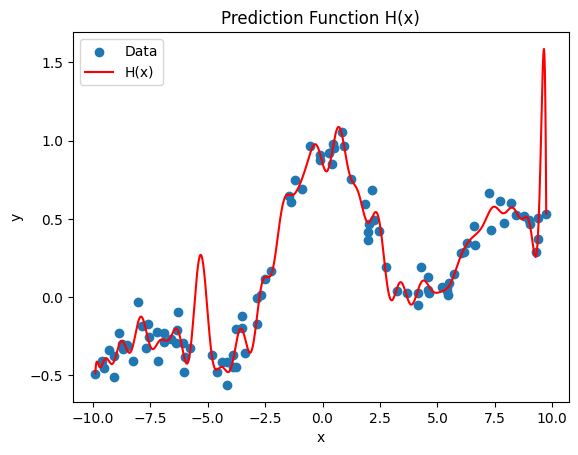

In [2]:
import matplotlib.pyplot as plt

# Generate x values for plotting
x_values = np.linspace(df['x'].min(), df['x'].max(), 1000)

# Generate Gaussian features for plotting
gaussian_features_plot = np.column_stack([gaussian_basis(x_values, mu, 1) for mu in mu_values])

# Predict y values
y_predicted = model.predict(gaussian_features_plot)

# Plot data points
plt.scatter(df['x'], df['y'], label='Data')

# Plot prediction function
plt.plot(x_values, y_predicted, color='red', label='H(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction Function H(x)')
plt.legend()
plt.show()

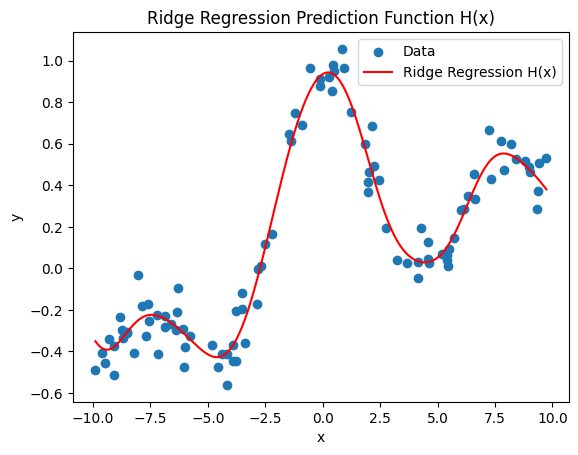

In [3]:
from sklearn.linear_model import Ridge

lambda_value = 1
ridge_model = Ridge(alpha=lambda_value)
ridge_model.fit(gaussian_features, df['y'])

# preds
y_predicted_ridge = ridge_model.predict(gaussian_features_plot)

# plot
plt.scatter(df['x'], df['y'], label='Data')
plt.plot(x_values, y_predicted_ridge, color='red', label='Ridge Regression H(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression Prediction Function H(x)')
plt.legend()
plt.show()